#**SIT 720 - Machine Learning**

Lecturer: Chandan Karmakar | karmakar@deakin.edu.au

School of Information Technology,
<br/>Deakin University, VIC 3125, Australia.

#**Assessment Task 2 (30 marks)**

##**Submission Instruction**
1.  Student should insert Python code or text responses into the cell followed by the question.

2.  For answers regarding discussion or explanation, **maximum five sentences are suggested**.

3.  Rename this notebook file appending your student ID. For example, for student ID 1234, the submitted file name should be A2_1234.ipynb.

4.  Insert your student ID and name in the following cell.

In [ ]:
# Student ID: 219446914

# Student name: Bui, Nhu Hoang Ha (Chloe)

## Part 1: Clustering *(15 marks)*

Let's assume you want to design an environment to predict a class/category from a dataset based on specific features of that class. However, all the features are not strong enough or in other words features not that much variance/uniqueness across the classes. So, you have to design a clustering model by answering the following questions:

1. Download the attached clustering.csv file. Read the file and separate the class and feature matrix. __(2 marks)__

In [85]:
# Importing libraries
import matplotlib.pyplot as mp
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.feature_selection import f_classif
from sklearn.metrics.cluster import v_measure_score
from sklearn.feature_selection import SelectKBest
from sklearn.decomposition import IncrementalPCA
from numpy import set_printoptions

In [86]:
# importing the csv data file
df = pd.read_csv("clustering.csv")
#separating the class and feature matrix
y = df.Class
X =  df.iloc[:,:-1]

Separating dataset from the csv file into 2 data frames with the X is the feature matrix which is the first 7 columns of the dataset, and the Y is the last column of the dataset which is the class matrix. 

2. Determine the number of clusters from the dataset. Is this same as the actual number of classes in the dataset? __(1 marks)__

<!-- Choose the best three features using different selection criteria (ANOVA, Chi-squared) based on the purity score for the k-mean cluster (Euclidean distance matrix). Which one is good and why? __(5 marks)__ -->

Text(0.5, 0, 'Number of cluster')

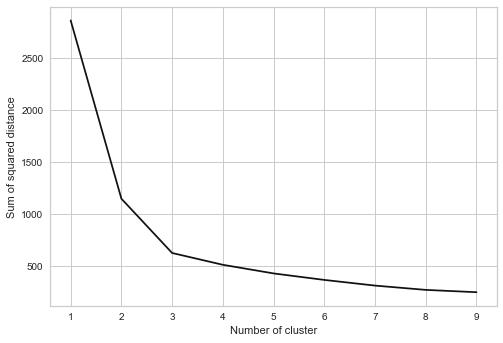

In [87]:
#Finding number of clusters
import sklearn.cluster as skc

totSqrdDist=[]
kRange = range(1,10)
for k in kRange:
    kmns = skc.KMeans(n_clusters=k)
    kmns = kmns.fit(df)
    totSqrdDist.append(kmns.inertia_)
    
mp.plot(kRange,totSqrdDist,'-xk')
mp.ylabel('Sum of squared distance')
mp.xlabel('Number of cluster')    


The optimal number of clusters by using Elbow method is k=3

In [88]:
print(f"Classes in the dataset: {list(y.value_counts().index)}")

Classes in the dataset: [2, 1, 0]


Using k ranges from 1 to 10. From the chart above, the optimal number of cluster using Elbow method is 3. Moreover, the actual number of classes in the dataset is also 3. Therefore, the number of clusters from the dataset is similar with the number classes in the dataset.

3. Perform K-Means clustering on the complete dataset and report purity score. __(2 marks)__ 

In [89]:
kmeans = KMeans(n_clusters = 3)
kmeans = kmeans.fit(X)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

print(labels)
print(centroids)

#Counting the number of the labels in each cluster and saving the data into clustering_classes
clustering_classes = {
    0: [0,0,0],
    1: [0,0,0],
    2: [0,0,0]
}
for i in range(len(y)):
    clustering_classes[labels[i]][y[i]] += 1

#Finding the most appeared label in each cluster and computing the purity score.
purity_score = (max(clustering_classes[0])+max(clustering_classes[1])+max(clustering_classes[2]))/len(y)
print(f"Purity score is {round(purity_score*100,2)}%")

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 2 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0
 1 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 0 0 0 0 0 2 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 0 0 0 0 1 0 0 0 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2]
[[14.64847222 14.46041667  0.87916667  5.56377778  3.27790278  2.64893333
   5.19231944]
 [18.72180328 16.29737705  0.88508689  6.20893443  3.72267213  3.60359016
   6.06609836]
 [11.96441558 13.27480519  0.8522      5.22928571  2.87292208  4.75974026
   5.08851948]]
Purity score is 89.52%


Based on the result, the purity score of Kmeans clustering is showing approximately 90%. This means almost 189 out of 210 observtions in the dataset are located in the right cluster.

4. There are several distance metrics for  K-Means such as euclidean, squared euclidean, Manhattan, Chebyshev, Minkowski. [ __Hints:__ See the pyclustering library for python.]
    - Your job is to compare the purity score of k-means clustering for different distance metrics. __(5 marks)__ 
    - Select the best distance metric and explain why this distance metric is best for the given dataset. __(2 marks)__ 

In [90]:
!pip install pyclustering

In [92]:
from pyclustering.samples.definitions import FCPS_SAMPLES
from pyclustering.cluster.center_initializer import kmeans_plusplus_initializer
from pyclustering.cluster.kmeans import kmeans, kmeans_visualizer
from pyclustering.utils.metric import distance_metric, type_metric

def purity_score(clusters_label):
    clustering_classes2 = {
        0: [0,0,0],
        1: [0,0,0],
        2: [0,0,0]
    }
    for cluster in range(3):
        for i in clusters_label[cluster]:
            clustering_classes2[cluster][y[i]] += 1
    purity = (max(clustering_classes2[0])+max(clustering_classes2[1])+max(clustering_classes2[2]))/len(y)
    return purity
 
#Preparing initial centroids using K-Means++ method.
initial_centroids = kmeans_plusplus_initializer(X, 3).initialize()

#K-mean with the Euclidean metric
euclidean_metric = distance_metric(type_metric.EUCLIDEAN)
kmeans_instance_euclidean = kmeans(X, initial_centroids, metric=euclidean_metric)
kmeans_instance_euclidean.process()
clusters_euclidean = kmeans_instance_euclidean.get_clusters()
final_centroids_euclidean = kmeans_instance_euclidean.get_centers()
print(f"Purity score of k-means with EUCLIDEAN metric is {round(purity_score(clusters_euclidean)*100, 2)}%")

# K-mean with the Euclidean Square metric
euclidean_square_metric = distance_metric(type_metric.EUCLIDEAN_SQUARE)
kmeans_instance_euclidean_square = kmeans(X, initial_centroids, metric=euclidean_square_metric)
kmeans_instance_euclidean_square.process()
clusters_euclidean_square = kmeans_instance_euclidean_square.get_clusters()
final_centroids_euclidean_square = kmeans_instance_euclidean_square.get_centers()
print(f"Purity score of k-means with EUCLIDEAN SQUARE metric is {round(purity_score(clusters_euclidean_square)*100, 2)}%")

# K-mean with the Manhattan metric
manhattan_metric = distance_metric(type_metric.MANHATTAN)
kmeans_instance_manhattan = kmeans(X, initial_centroids, metric=manhattan_metric)
kmeans_instance_manhattan.process()
clusters_manhattan = kmeans_instance_manhattan.get_clusters()
final_centroids_manhattan = kmeans_instance_manhattan.get_centers()
print(f"Purity score of k-means with MANHATTAN metric is {round(purity_score(clusters_manhattan)*100, 2)}%")

#K-mean with the Chebyshev metric
chebyshev_metric = distance_metric(type_metric.CHEBYSHEV)
kmeans_instance_chebyshev = kmeans(X, initial_centroids, metric=chebyshev_metric)
kmeans_instance_chebyshev.process()
clusters_chebyshev = kmeans_instance_chebyshev.get_clusters()
final_centroids_chebyshev = kmeans_instance_chebyshev.get_centers()
print(f"Purity score of k-means with CHEBYSHEV metric is {round(purity_score(clusters_chebyshev)*100, 2)}%")

#K-mean with the Minkowski metric (p = 4)
minkowski_metric = distance_metric(type_metric.MINKOWSKI, degree = 4)
kmeans_instance_minkowski = kmeans(X, initial_centroids, metric=minkowski_metric)
kmeans_instance_minkowski.process()
clusters_minkowski = kmeans_instance_minkowski.get_clusters()
final_centroids_minkowski = kmeans_instance_minkowski.get_centers()
print(f"Purity score of k-means with MINKOWSKI metric (p = 4) is {round(purity_score(clusters_minkowski)*100, 2)}%")

Purity score of k-means with EUCLIDEAN metric is 89.52%
Purity score of k-means with EUCLIDEAN SQUARE metric is 89.52%
Purity score of k-means with MANHATTAN metric is 89.05%
Purity score of k-means with CHEBYSHEV metric is 87.62%
Purity score of k-means with MINKOWSKI metric (p = 4) is 88.57%


- Based on the purity score summary of K-means clustering with different distance metrics, both the Euclidean and Euclidean Square metrics have the highest purity score (89.52%). While the lowest purity score is the k-means with Chebyshev metric (87.62%).

- Therefore, these EUCLIDEAN metrics are the best to work with this dataset because they have the highest purity score which means almost 90% of observtions will be located in the right cluster.

5. Use selection criteria (ANOVA, Chi-squared) to select best three features and use them for K-Means clustering. Based on the purity score which feature set are you going to recommend and why? __(3 marks)__

In [93]:
#Using ANOVA to create the new dataset with only best three selected features 
X_new_anova = SelectKBest(f_classif, k=3).fit_transform(X, y)
X_new_anova = pd.DataFrame(X_new_anova, columns = ["height", "length", "min"])
print("The dataset with best three selected features after using ANOVA:")
print(X_new_anova.head())
kmeans_anova = KMeans(n_clusters = 3).fit(X_new_anova)
labels_anova = kmeans_anova.labels_
#Counting the number of the labels in each cluster and saving the data into clustering_classes
clustering_classes_anova = {
    0: [0,0,0],
    1: [0,0,0],
    2: [0,0,0]
}
for i in range(len(y)):
    clustering_classes_anova[labels_anova[i]][y[i]] += 1
    
#Finding the most appeared label in each cluster and computing the purity score
purity_score_anova = (max(clustering_classes_anova[0])+max(clustering_classes_anova[1])+max(clustering_classes_anova[2]))/len(y)
print(f"Purity score of the new data after using ANOVA {round(purity_score_anova*100, 2)}%")



#Using Chi Square to create the new dataset with only best three selected features  
from sklearn.feature_selection import SelectKBest, chi2, f_classif
X_new_chi = SelectKBest(chi2, k=3).fit_transform(X, y)
X_new_chi = pd.DataFrame(X_new_chi, columns = ["height", "length", "max"])
print("The dataset with best three selected features after using Chi Square:")
print(X_new_chi.head())
kmeans_chi = KMeans(n_clusters = 3).fit(X_new_chi)
labels_chi = kmeans_chi.labels_
#Counting the number of the labels in each cluster and saving the data into clustering_classes
clustering_classes_chi = {
    0: [0,0,0],
    1: [0,0,0],
    2: [0,0,0]
}
for i in range(len(y)):
    clustering_classes_chi[labels_chi[i]][y[i]] += 1
    
#Finding the most appeared label in each cluster and computing the purity score
purity_score_chi = (max(clustering_classes_chi[0])+max(clustering_classes_chi[1])+max(clustering_classes_chi[2]))/len(y)
print(f"Purity score of the new data after using Chi Square {round(purity_score_chi*100, 2)}%")

The dataset with best three selected features after using ANOVA:
   height  length    min
0   15.26   14.84  3.312
1   14.88   14.57  3.333
2   14.29   14.09  3.337
3   13.84   13.94  3.379
4   16.14   14.99  3.562
Purity score of the new data after using ANOVA 84.29%
The dataset with best three selected features after using Chi Square:
   height  length    max
0   15.26   14.84  2.221
1   14.88   14.57  1.018
2   14.29   14.09  2.699
3   13.84   13.94  2.259
4   16.14   14.99  1.355
Purity score of the new data after using Chi Square 89.52%


From the result of purity score, the dataset after applying Chi Square to select 3 best features has higher purity score (around 90%) and is similar with the purity score of the original dataset (Question 3). While the data set using ANOVA has lower purity score, just 84%. Therefore, the feature set is recommended to use include: Height, Max, and Length because the higher purity score and time-saving instead of using the whole dataset.

# Part-2 (Dimensionality Reduction using PCA/SVD) *(15 marks)*

1. For the dataset (clustering.csv), perform PCA.
    - plot the captured variance with respect to increasing latent dimensionality. __(2.5 marks)__
  
  What is the minimum dimension that captures:
    - at least 89% variance? __(1.5 marks)__
    - at least 99% variance? __(1 marks)__

Text(0, 0.5, 'Variance captured')

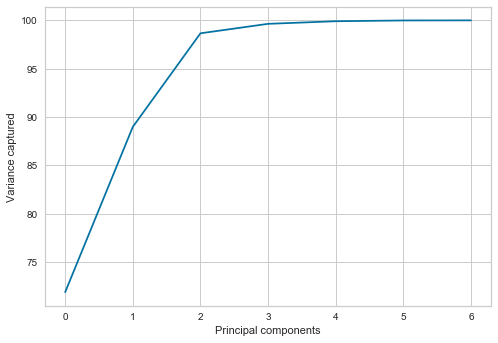

In [94]:
#Normalizing the dataset
from sklearn.preprocessing import scale
Xnormalize = scale(X)

#Using sklearn PCA implementation to perform PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=7)
# Fitting PCA model
pca = pca.fit(Xnormalize)
var = pca.explained_variance_ratio_
var1 = np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
#Plotting the captured variance with respect to increasing latent dimensionality.
mp.plot(var1)
mp.xlabel("Principal components")
mp.ylabel("Variance captured")

In [95]:
pca_89 = PCA(n_components= 0.89)
X_89 = pca_89.fit_transform(Xnormalize)
print(f"Minimum dimension that captures at least 89% variance is {X_89.shape[1]}")

pca_89 = PCA(n_components= 0.89)
X_99 = pca_99.fit_transform(Xnormalize)
print(f"Minimum dimension that captures at least 99% variance is {X_99.shape[1]}")

Minimum dimension that captures at least 89% variance is 3
Minimum dimension that captures at least 99% variance is 4


2. Determine the purity of clusters formed by the number of principal components which captured 89% and 99% variances respectively. Plot a line graph of the purity scores against the captured variances. Discuss your findings. __(7 marks)__

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)
The purity score is 92.38 %
KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)
The purity score is 91.9 %


Text(0, 0.5, 'Purity scores')

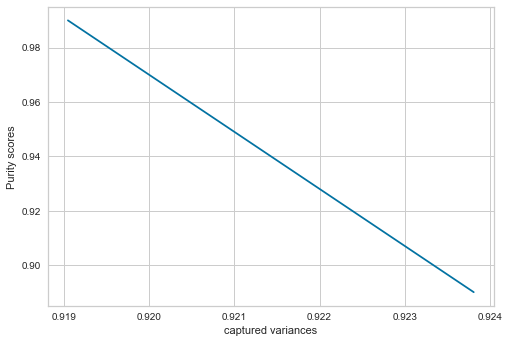

In [97]:
#With 89% captured variances
kmeans_89 = KMeans(n_clusters = 3).fit(X_89)
print(kmeans_89)
labels_89 = kmeans_89.labels_

#Counting the number of the labels in each cluster and saving the data into clustering_classes
clustering_classes_89 = {
    0: [0,0,0],
    1: [0,0,0],
    2: [0,0,0]
}
for i in range(len(y)):
    clustering_classes_89[labels_89[i]][y[i]] += 1

#Finding the most appeared label in each cluster and computing the purity score
purity_score_89 = (max(clustering_classes_89[0])+max(clustering_classes_89[1])+max(clustering_classes_89[2]))/len(y)
print(f"The purity score is {round(purity_score_89*100,2)} %")


#With 99% captured variances
kmeans_99 = KMeans(n_clusters = 3).fit(X_99)
print(kmeans_99)
labels_99 = kmeans_99.labels_

#Counting the number of the labels in each cluster and saving the data into clustering_classes
clustering_classes_99 = {
    0: [0,0,0],
    1: [0,0,0],
    2: [0,0,0]
}
for i in range(len(y)):
    clustering_classes_99[labels_99[i]][y[i]] += 1

#Finding the most appeared label in each cluster and computing the purity score
purity_score_99 = (max(clustering_classes_99[0])+max(clustering_classes_99[1])+max(clustering_classes_99[2]))/len(y)
print(f"The purity score is {round(purity_score_99*100,2)} %")

purity_scores = [purity_score_89, purity_score_99] 
Variance = [0.89, 0.99]
mp.plot(purity_scores, Variance)
mp.xlabel("captured variances")
mp.ylabel("Purity scores")

Firstly, the purity score of clusters formed by the number of pricipal components is determined with 89% and 99% captured variances, respectively. From the line graph between the purity score and captured variances, the purity score for 89% captured variances is 92.38% while the purity score for 99% captured variances is lower, just 91.9%. Therefore, the recommended captured variances for implementing PCA is 89%.

3. Let's assume you have two datasets one is linear and another is curved structural data.
    - Can we apply PCA on these datasets? Justify your answer. __(3 marks)__ 

There are 3 assumptions of PCA:
 
Correlations: There should be correlating factors to be considered for the PCA. 
 
Linearity: The assumption that the relationship amongst variables are related linearly. 
 
Outliers: should be removed as PCA is sensitive to outliers. 
 
Therefore, PCA is only applied on the linear data while with the structured data, PCA cannot be applied. A PCA computation still can be done on the nonlinear data but the outcomes will be negligible, except decomposing to the prevailing linear modes and providing a worldwide linear representation of the spread of the data. On the off chance that the data is non-linear, there are two prospects:
 
1) Try to do the transformation that will make the data is linear 
 
2) Use a non-straight measurement decrease (Nonlinear dimensionality reduction 2020)
Nonlinear PCA (NLPCA) utilizes backpropagation to prepare a multi-layer perceptron (MLP) to fit to a complex. Dissimilar to commonplace MLP preparing, which just updates the weights, NLPCA refreshes both the weights and the inputs. They are considered as latent values. Subsequent to preparing, the latent inputs are a low-dimensional portrayal of the watched vectors, and the multi-layer perceptron maps are also from that low-dimensional portrayal to the high-dimensional perception space.

References

‘Nonlinear dimensionality reduction’ 2020, Wikipedia, the free encyclopedia, 26 August, retrieved 27 August 2020, <http://en.wikipedia.org/wiki/Nonlinear_dimensionality_reduction>.